In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## 데이터셋에서 필요한 독립변수들의 값 추출

In [3]:
cancer_data = cancer.data
cancer_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## 데이터셋에서 종속변수값 추출 => 분류라서 0과 1의 값

In [4]:
cancer_target = cancer.target
cancer_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.target_names
# malignant : 악성
# benign : 양성 (음성이 아님)

array(['malignant', 'benign'], dtype='<U9')

## 한눈에 보기위해 데이터프레임 => 컬럼명은 독립변수 명
## 데이터프레임에 종속변수 합치기

In [7]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [8]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
cancer_df['label'] = cancer.target

In [10]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## train, test 셋으로 분리

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target,
                                                   test_size = 0.2, random_state=11)

In [12]:
X_train.shape

(455, 30)

In [13]:
len(y_test)

114

## 분류를 위해 의사결정나무 활용

In [14]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [15]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [16]:
# fit에 테스트셋을 넣어 새로운 모델 예측
pred = dt_clf.predict(X_test)

In [17]:
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [18]:
print(pred ,y_test, sep = '\n')

[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1
 0 1 0]
[0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0]


## 예측 정확도 평가

In [19]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9649


# 디시젼트리 그래프비즈로 시각화

In [20]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names= cancer.target_names, \
                feature_names = cancer.feature_names, impurity=True, filled=True)

# out_file : 파일로 저장
# class_name : 종속
# feature_names : 독립
# impurity : 지니계수
# filled : node색 다르게

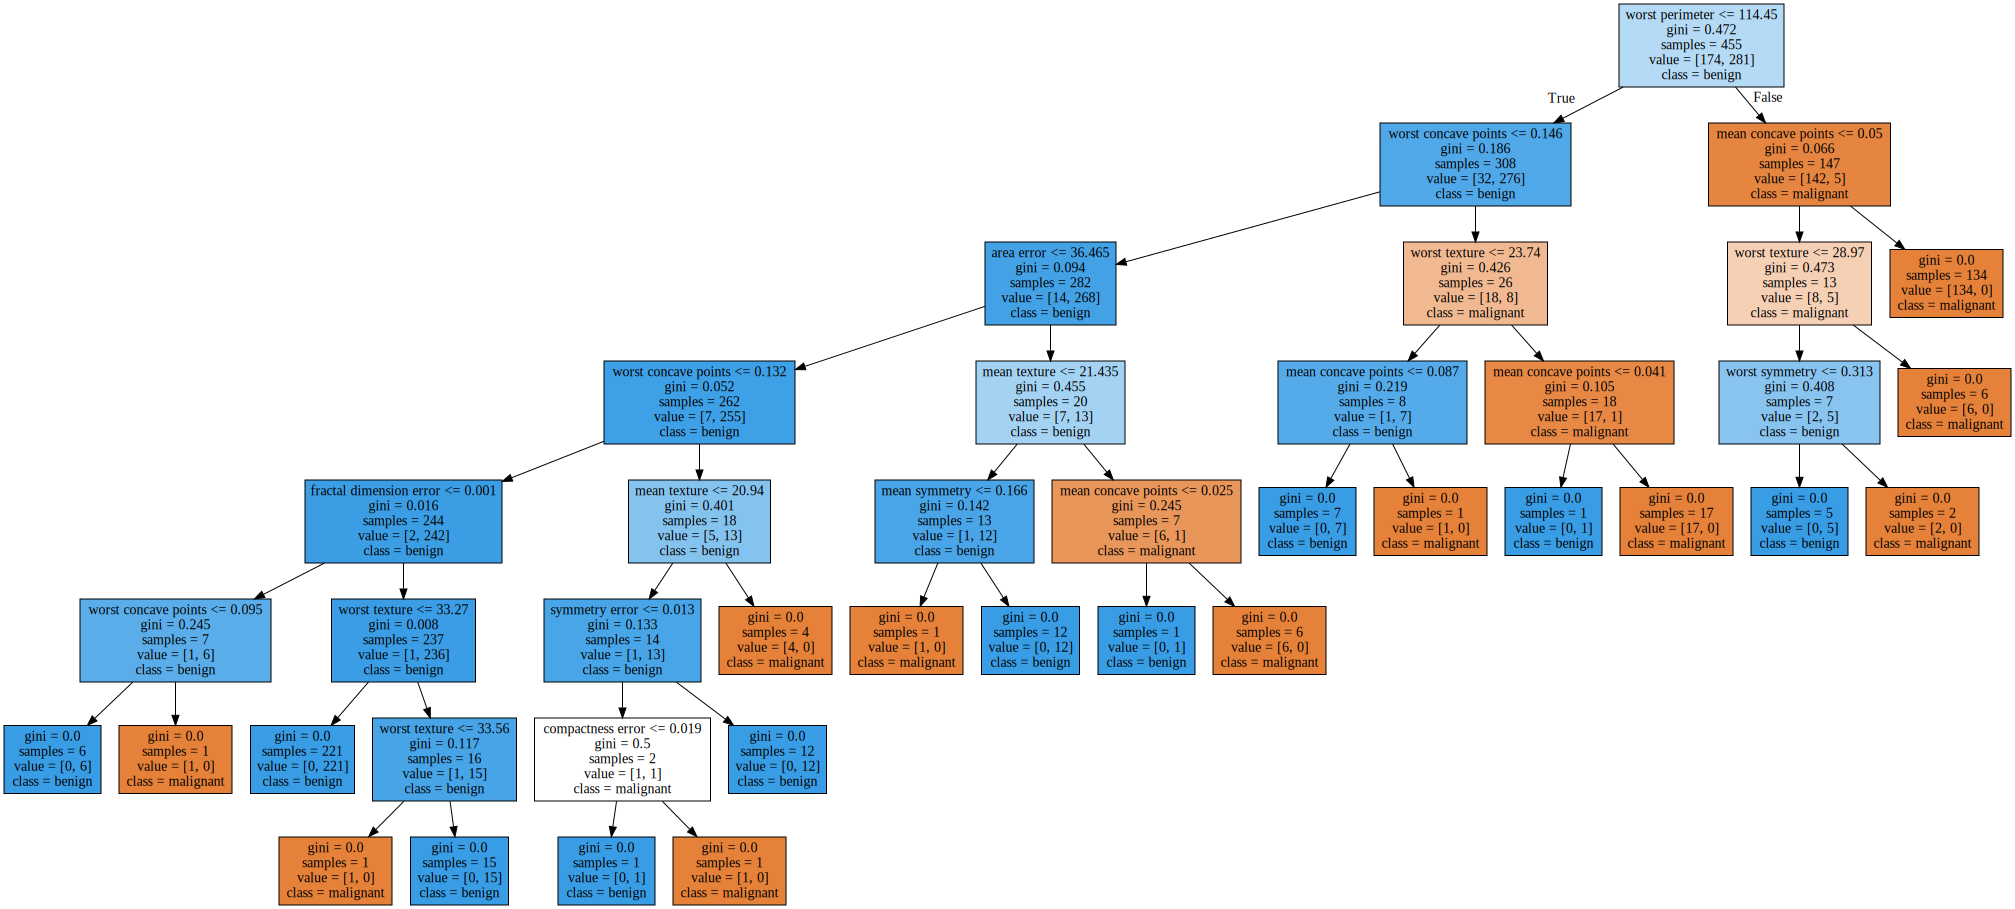

In [21]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
# with open : "파일을 읽겠다"
with open("tree.dot") as f:
    dot_graph = f.read()

# graphviz.Source 메소드로 dot_graph 읽기
graphviz.Source(dot_graph)

## 디시젼트리 피처 중요도 파악

In [22]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [23]:
# cancer 데이터의 피처 확인
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
# 피처에 대한 각각의 feature importance 확인
dt_clf.feature_importances_

array([0.        , 0.05073845, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04122114, 0.00859001, 0.        ,
       0.        , 0.        , 0.        , 0.01807183, 0.        ,
       0.00465292, 0.        , 0.        , 0.00398822, 0.00121612,
       0.        , 0.05921448, 0.68820526, 0.        , 0.        ,
       0.        , 0.        , 0.1108075 , 0.01329406, 0.        ])

In [25]:
# feature importance 소수 3째 자리까지
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature importances:
[0.    0.051 0.    0.    0.    0.    0.    0.041 0.009 0.    0.    0.
 0.    0.018 0.    0.005 0.    0.    0.004 0.001 0.    0.059 0.688 0.
 0.    0.    0.    0.111 0.013 0.   ]


mean radius : 0.000
mean texture : 0.051
mean perimeter : 0.000
mean area : 0.000
mean smoothness : 0.000
mean compactness : 0.000
mean concavity : 0.000
mean concave points : 0.041
mean symmetry : 0.009
mean fractal dimension : 0.000
radius error : 0.000
texture error : 0.000
perimeter error : 0.000
area error : 0.018
smoothness error : 0.000
compactness error : 0.005
concavity error : 0.000
concave points error : 0.000
symmetry error : 0.004
fractal dimension error : 0.001
worst radius : 0.000
worst texture : 0.059
worst perimeter : 0.688
worst area : 0.000
worst smoothness : 0.000
worst compactness : 0.000
worst concavity : 0.000
worst concave points : 0.111
worst symmetry : 0.013
worst fractal dimension : 0.000


<AxesSubplot:>

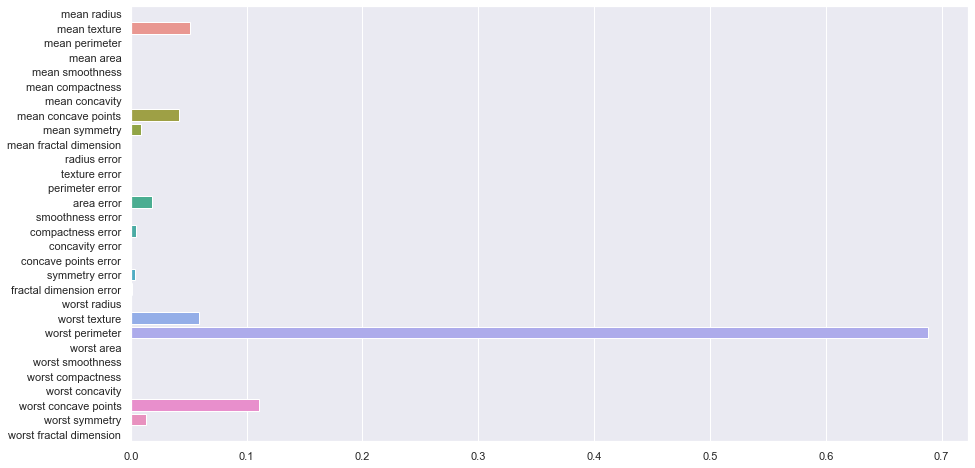

In [26]:
# feature별 importance 매핑
for name, value in zip(cancer.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=dt_clf.feature_importances_ , y=cancer.feature_names)

In [27]:
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 11, 'splitter': 'best'}


In [28]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9649


# GridSearchCV로 DecisionTreeClassifier 하이퍼 파라미터 튜닝

In [29]:
%%time
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [4, 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.9275
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}
Wall time: 187 ms


In [30]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [31]:
# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
result_rank = cv_results_df[['param_max_depth', 'mean_test_score', 'rank_test_score']]   # 리스트에서 'mean_train_score' 제거한 상태

# test socre 순위 기준으로 정렬해보면 아래와 같다.
result_rank.sort_values(by='rank_test_score')

,param_max_depth,mean_test_score,rank_test_score
2,8,0.927473,1
3,10,0.927473,1
4,12,0.927473,1
5,16,0.927473,1
6,20,0.927473,1
7,24,0.927473,1
1,6,0.925275,7
0,4,0.918681,8


In [32]:
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
max_depths = [ 4, 6, 8 ,10, 12, 16 ,20 ]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=11)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 4 정확도: 0.9561
max_depth = 6 정확도: 0.9561
max_depth = 8 정확도: 0.9649
max_depth = 10 정확도: 0.9649
max_depth = 12 정확도: 0.9649
max_depth = 16 정확도: 0.9649
max_depth = 20 정확도: 0.9649


In [33]:
%%time
# min_samples_split 하이퍼 파라미터도 추가해서 GridSearchCV 수행 (수행시간 1~2분 정도)
params = {
    'max_depth' : [ 4, 6, 8 , 12, 16 , 20 ], 
    'min_samples_split' : [ 4, 6 , 8, 12, 16, 24 ],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )

grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_), '\n')
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV 최고 평균 정확도 수치: 0.9253 

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 6}
Wall time: 744 ms


In [34]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=6, random_state=11)

In [35]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.9561


In [36]:
# 피처 중요도 확인해보기
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances_values

array([0.        , 0.05097563, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03340011, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01815631, 0.00801373,
       0.00863017, 0.        , 0.        , 0.00400686, 0.0012218 ,
       0.        , 0.05949129, 0.6914224 , 0.        , 0.        ,
       0.        , 0.        , 0.11132549, 0.01335621, 0.        ])

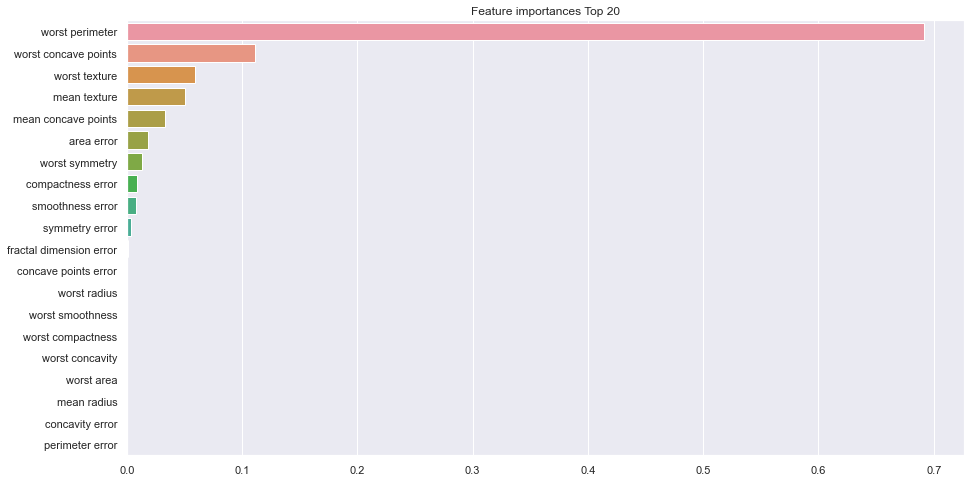

In [37]:
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index= cancer.feature_names)

# 중요도값 순으로 Series를 정렬. 피처는 중요도 상위 20개만 추출해서 정렬.
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(15, 8))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## VotingClassifier로 로지스틱 회귀와 KNN을 보팅 방식으로 결합하고 단일 모델과 성능을 비교해보자

In [38]:
import pandas as pd

from sklearn.ensemble import VotingClassifier # 앙상블 - 보팅
from sklearn.linear_model import LogisticRegression # 분류 알고리즘
from sklearn.neighbors import KNeighborsClassifier  # 분류 알고리즘 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [39]:
# 개별 모델은 로지스틱 회귀와 KNN 임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR', lr_clf),('KNN', knn_clf)] , voting='soft')
vo_clf

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [40]:
# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9737


In [41]:
# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__  # classifier 이름확인하는 방법
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9561


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=11, max_depth=10) 
# (default) min_samples_leaf=1, min_samples_split=2

rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9825


## GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝

In [44]:
%%time
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' :  [1, 8, 12, 18],
    'min_samples_split' : [2, 8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-1)  # n_jobs=-1 : 컴퓨터의 모든 코어를 다 사용해라
                                                           # https://aimb.tistory.com/150
# 그리드서치 수행
# # n_jobs=-1  : 전체 cpu core를 사용해라.
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9538
Wall time: 6.14 s


## 튜닝된 하이퍼 파라미터로 랜덤포레스트 재학습/예측/평가

In [45]:
# n_estimators(결정 트리 개수)는 300으로 늘린다.
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=2, random_state=11)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9825


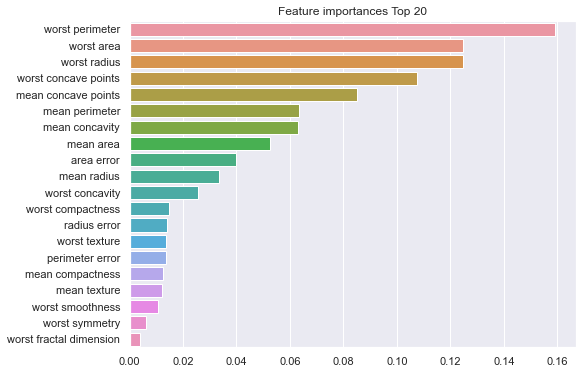

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index= cancer.feature_names )

# 중요도가 높은 20개의 피처들만 확인
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

In [47]:
# 수행시간 약 8분
from sklearn.ensemble import GradientBoostingClassifier
import time

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

# GBM 클래스 객체 생성
gb_clf = GradientBoostingClassifier(random_state=15)   # n_estimators = 100(default)

In [48]:
# 학습
gb_clf.fit(X_train , y_train)

# 예측
gb_pred = gb_clf.predict(X_test)

# 평가
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))  # 약 8분

GBM 정확도: 0.9825
GBM 수행 시간: 0.3 초 


In [49]:
# 수행시간 - n_jobs defalut : 
#          n_jobs=-1 : 약 
# 그리드서치 수행

from sklearn.model_selection import GridSearchCV

start_time = time.time()
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1, n_jobs=-1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print("학습에 걸린 시간: ".format(time.time() - start_time))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도: 0.9450
학습에 걸린 시간: 


In [50]:
# 그리드서치 결과 보기
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
0,"{'learning_rate': 0.05, 'n_estimators': 100}",0.945011,1,0.964912,0.925110
1,"{'learning_rate': 0.05, 'n_estimators': 500}",0.940654,2,0.942982,0.938326
2,"{'learning_rate': 0.1, 'n_estimators': 100}",0.940625,3,0.956140,0.925110
3,"{'learning_rate': 0.1, 'n_estimators': 500}",0.938442,4,0.947368,0.929515


In [51]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9912


## XGBoost

### case1. python wrapper xgb

In [52]:
import xgboost as xgb   # Python wrapper xgb
from xgboost import plot_importance

In [53]:
# Python Wrapper XGBoost - 학습과 예측 데이터 세트를 DMatrix로 변환 필요
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

** 하이퍼 파라미터 설정 **

In [54]:
params = { 'max_depth':3,
           'eta': 0.1,   # 학습률(0.1 ~ 0.01)
           'objective':'binary:logistic',  # 예측 결정 함수 : 이진 분류
           'eval_metric':'logloss',  #평가지표 : logloss
           'early_stoppings':100   # 100번동안 성능향상 없으면 학습 조기종료
        }

# 학습 횟수
num_rounds = 400

In [55]:
# 데이터를 학습용은 ‘train’ , 검증용은 ‘eval’로 표시
wlist = [(dtrain,'train'),(dtest,'eval') ]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)  #xgb.fit이 아닌 xgb.train
xgb_model

[11:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.61325	eval-logloss:0.61282
[1]	train-logloss:0.54348	eval-logloss:0.54112
[2]	train-logloss:0.48665	eval-logloss:0.48139
[3]	train-logloss:0.43676	eval-logloss:0.42984
[4]	train-logloss:0.39648	eval-logloss:0.38936
[5]	train-logloss:0.36053	eval-logloss:0.35109
[6]	train-logloss:0.32853	eval-logloss:0.32014
[7]	train-logloss:0.29896	eval-logloss:0.29190
[8]	train-logloss:0.27343	eval-logloss:0.26556
[9]	train-logloss:0.25042	eval-logloss:0.24385
[10]	train-logloss:0.23213	eval-logloss:0.22614
[11]	train-logloss:0.21369	eval-logloss:0.21025
[12]	train

[161]	train-logloss:0.00789	eval-logloss:0.02781
[162]	train-logloss:0.00785	eval-logloss:0.02768
[163]	train-logloss:0.00781	eval-logloss:0.02760
[164]	train-logloss:0.00776	eval-logloss:0.02763
[165]	train-logloss:0.00773	eval-logloss:0.02750
[166]	train-logloss:0.00769	eval-logloss:0.02743
[167]	train-logloss:0.00767	eval-logloss:0.02734
[168]	train-logloss:0.00764	eval-logloss:0.02729
[169]	train-logloss:0.00760	eval-logloss:0.02722
[170]	train-logloss:0.00758	eval-logloss:0.02742
[171]	train-logloss:0.00756	eval-logloss:0.02736
[172]	train-logloss:0.00755	eval-logloss:0.02729
[173]	train-logloss:0.00751	eval-logloss:0.02732
[174]	train-logloss:0.00749	eval-logloss:0.02745
[175]	train-logloss:0.00744	eval-logloss:0.02747
[176]	train-logloss:0.00743	eval-logloss:0.02748
[177]	train-logloss:0.00739	eval-logloss:0.02741
[178]	train-logloss:0.00737	eval-logloss:0.02732
[179]	train-logloss:0.00734	eval-logloss:0.02735
[180]	train-logloss:0.00730	eval-logloss:0.02728
[181]	train-logloss:

[329]	train-logloss:0.00575	eval-logloss:0.02859
[330]	train-logloss:0.00575	eval-logloss:0.02855
[331]	train-logloss:0.00574	eval-logloss:0.02853
[332]	train-logloss:0.00573	eval-logloss:0.02854
[333]	train-logloss:0.00573	eval-logloss:0.02863
[334]	train-logloss:0.00572	eval-logloss:0.02854
[335]	train-logloss:0.00571	eval-logloss:0.02859
[336]	train-logloss:0.00571	eval-logloss:0.02855
[337]	train-logloss:0.00570	eval-logloss:0.02864
[338]	train-logloss:0.00569	eval-logloss:0.02855
[339]	train-logloss:0.00569	eval-logloss:0.02854
[340]	train-logloss:0.00568	eval-logloss:0.02852
[341]	train-logloss:0.00567	eval-logloss:0.02853
[342]	train-logloss:0.00567	eval-logloss:0.02848
[343]	train-logloss:0.00566	eval-logloss:0.02847
[344]	train-logloss:0.00565	eval-logloss:0.02856
[345]	train-logloss:0.00565	eval-logloss:0.02851
[346]	train-logloss:0.00564	eval-logloss:0.02856
[347]	train-logloss:0.00563	eval-logloss:0.02847
[348]	train-logloss:0.00563	eval-logloss:0.02856
[349]	train-logloss:

In [56]:
pred_probs = xgb_model.predict(dtest)  #dtest를 넣는다.
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.    0.    0.    0.    0.    0.997 0.734 0.999 1.    0.999]


In [57]:
# 예측 확률이 0.5 보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 리스트에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:', preds[:10])

예측값 10개만 표시: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc), '\n')

In [59]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[36  2]
 [ 0 76]]
정확도: 0.9825, 정밀도: 0.9744, 재현율: 1.0000,    F1: 0.9870, AUC:0.9997 



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

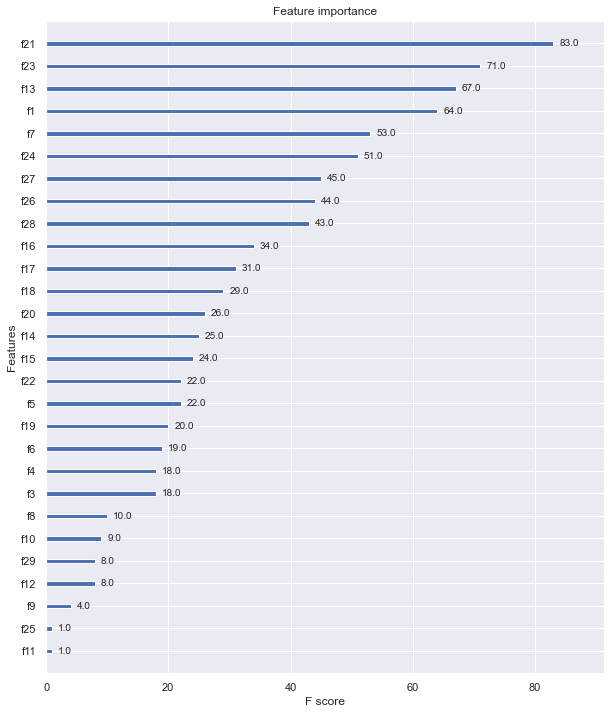

In [60]:
#Feature Importance 시각화
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### case2. 사이킷런 Wrapper XGBoost

In [61]:
# Scikit-learn Wrapper XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

In [62]:
# 원래 검증에 test 데이터를 사용하면 안되지만 여기서는 검증 데이터가 따로 없으므로 쓴다.
evals = [(X_test, y_test)]

# XGBClassifier 클래스의 객체 생성
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

In [63]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, eval_metric="logloss",  verbose=True)

[0]	validation_0-logloss:0.61282
[1]	validation_0-logloss:0.54112
[2]	validation_0-logloss:0.48139
[3]	validation_0-logloss:0.42984
[4]	validation_0-logloss:0.38936
[5]	validation_0-logloss:0.35109
[6]	validation_0-logloss:0.32014
[7]	validation_0-logloss:0.29190
[8]	validation_0-logloss:0.26556
[9]	validation_0-logloss:0.24385
[10]	validation_0-logloss:0.22614
[11]	validation_0-logloss:0.21025
[12]	validation_0-logloss:0.19319
[13]	validation_0-logloss:0.17976
[14]	validation_0-logloss:0.16620
[15]	validation_0-logloss:0.15614
[16]	validation_0-logloss:0.14731
[17]	validation_0-logloss:0.13762
[18]	validation_0-logloss:0.12923
[19]	validation_0-logloss:0.12281
[20]	validation_0-logloss:0.11820
[21]	validation_0-logloss:0.11244
[22]	validation_0-logloss:0.10646
[23]	validation_0-logloss:0.10116
[24]	validation_0-logloss:0.09627
[25]	validation_0-logloss:0.09168
[26]	validation_0-logloss:0.08974
[27]	validation_0-logloss:0.08500
[28]	validation_0-logloss:0.08140
[29]	validation_0-loglos

[238]	validation_0-logloss:0.02726
[239]	validation_0-logloss:0.02724
[240]	validation_0-logloss:0.02728
[241]	validation_0-logloss:0.02726
[242]	validation_0-logloss:0.02739
[243]	validation_0-logloss:0.02756
[244]	validation_0-logloss:0.02752
[245]	validation_0-logloss:0.02745
[246]	validation_0-logloss:0.02755
[247]	validation_0-logloss:0.02749
[248]	validation_0-logloss:0.02750
[249]	validation_0-logloss:0.02748
[250]	validation_0-logloss:0.02747
[251]	validation_0-logloss:0.02739
[252]	validation_0-logloss:0.02752
[253]	validation_0-logloss:0.02761
[254]	validation_0-logloss:0.02755
[255]	validation_0-logloss:0.02751
[256]	validation_0-logloss:0.02749
[257]	validation_0-logloss:0.02765
[258]	validation_0-logloss:0.02763
[259]	validation_0-logloss:0.02772
[260]	validation_0-logloss:0.02766
[261]	validation_0-logloss:0.02778
[262]	validation_0-logloss:0.02773
[263]	validation_0-logloss:0.02769
[264]	validation_0-logloss:0.02762
[265]	validation_0-logloss:0.02762
[266]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
# 예측
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [65]:
# 평가
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[36  2]
 [ 0 76]]
정확도: 0.9825, 정밀도: 0.9744, 재현율: 1.0000,    F1: 0.9870, AUC:1.0000 



### early_stopping_rounds을 50으로 설정하고 재 학습/예측/평가

In [66]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]

# early_stopping_rounds=50
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61282
[1]	validation_0-logloss:0.54112
[2]	validation_0-logloss:0.48139
[3]	validation_0-logloss:0.42984
[4]	validation_0-logloss:0.38936
[5]	validation_0-logloss:0.35109
[6]	validation_0-logloss:0.32014
[7]	validation_0-logloss:0.29190
[8]	validation_0-logloss:0.26556
[9]	validation_0-logloss:0.24385
[10]	validation_0-logloss:0.22614
[11]	validation_0-logloss:0.21025
[12]	validation_0-logloss:0.19319
[13]	validation_0-logloss:0.17976
[14]	validation_0-logloss:0.16620
[15]	validation_0-logloss:0.15614
[16]	validation_0-logloss:0.14731
[17]	validation_0-logloss:0.13762
[18]	validation_0-logloss:0.12923
[19]	validation_0-logloss:0.12281
[20]	validation_0-logloss:0.11820
[21]	validation_0-logloss:0.11244
[22]	validation_0-logloss:0.10646
[23]	validation_0-logloss:0.10116
[24]	validation_0-logloss:0.09627
[25]	validation_0-logloss:0.09168
[26]	validation_0-logloss:0.08974
[27]	validation_0-logloss:0.08500
[28]	validation_0-logloss:0.08140
[29]	validation_0-loglos

In [67]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[36  2]
 [ 0 76]]
정확도: 0.9825, 정밀도: 0.9744, 재현율: 1.0000,    F1: 0.9870, AUC:1.0000 



In [68]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 

# 학습(early_stopping_rounds=10)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)
# 예측
ws10_preds = xgb_wrapper.predict(X_test)

# 평가
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61282
[1]	validation_0-logloss:0.54112
[2]	validation_0-logloss:0.48139
[3]	validation_0-logloss:0.42984
[4]	validation_0-logloss:0.38936
[5]	validation_0-logloss:0.35109
[6]	validation_0-logloss:0.32014
[7]	validation_0-logloss:0.29190
[8]	validation_0-logloss:0.26556
[9]	validation_0-logloss:0.24385
[10]	validation_0-logloss:0.22614
[11]	validation_0-logloss:0.21025
[12]	validation_0-logloss:0.19319
[13]	validation_0-logloss:0.17976
[14]	validation_0-logloss:0.16620
[15]	validation_0-logloss:0.15614
[16]	validation_0-logloss:0.14731
[17]	validation_0-logloss:0.13762
[18]	validation_0-logloss:0.12923
[19]	validation_0-logloss:0.12281
[20]	validation_0-logloss:0.11820
[21]	validation_0-logloss:0.11244
[22]	validation_0-logloss:0.10646
[23]	validation_0-logloss:0.10116
[24]	validation_0-logloss:0.09627
[25]	validation_0-logloss:0.09168
[26]	validation_0-logloss:0.08974
[27]	validation_0-logloss:0.08500
[28]	validation_0-logloss:0.08140
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

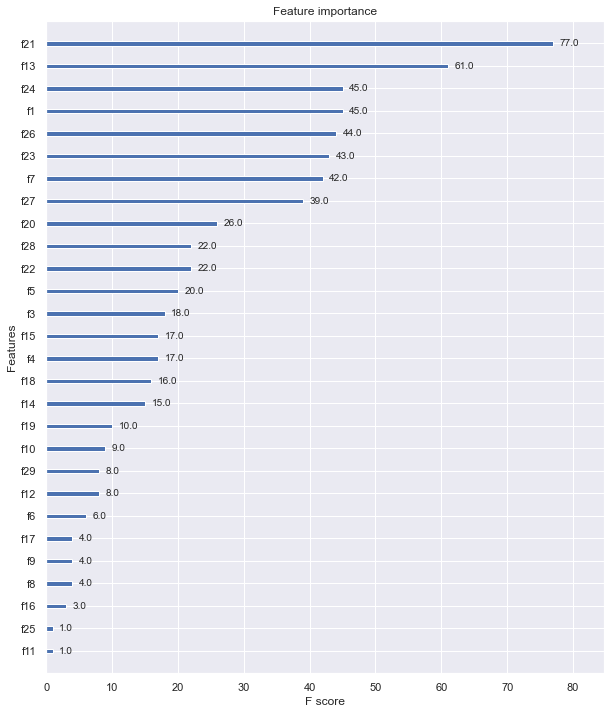

In [69]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

# feature importance 확인은 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

## LightGBM

In [70]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

In [71]:
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]  # 원래 evals 데이터는 검증 데이터 셋을 별도로 둬야되는데 여기서는 테스트 데이터 사용
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.563819
[2]	valid_0's binary_logloss: 0.499158
[3]	valid_0's binary_logloss: 0.448067
[4]	valid_0's binary_logloss: 0.401018
[5]	valid_0's binary_logloss: 0.361462
[6]	valid_0's binary_logloss: 0.329586
[7]	valid_0's binary_logloss: 0.298421
[8]	valid_0's binary_logloss: 0.271126
[9]	valid_0's binary_logloss: 0.248142
[10]	valid_0's binary_logloss: 0.228089
[11]	valid_0's binary_logloss: 0.21386
[12]	valid_0's binary_logloss: 0.19799
[13]	valid_0's binary_logloss: 0.184998
[14]	valid_0's binary_logloss: 0.173513
[15]	valid_0's binary_logloss: 0.162488
[16]	valid_0's binary_logloss: 0.155302
[17]	valid_0's binary_logloss: 0.145601
[18]	valid_0's binary_logloss: 0.138116
[19]	valid_0's binary_logloss: 0.131759
[20]	valid_0's binary_logloss: 0.125033
[21]	valid_0's binary_logloss: 0.119589
[22]	valid_0's binary_logloss: 0.113771
[23]	valid_0's binary_logloss: 0.109999
[24]	valid_0's binary_logloss: 0.10591
[25]	valid_0's binary_logloss: 0.100538
[26]	valid_0

LGBMClassifier(n_estimators=400)

In [72]:
preds = lgbm_wrapper.predict(X_test)
preds

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [73]:
# 1 예측 확률값 10개만 확인
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]  # 종속이 1일 확률만 추출
pred_proba[:10]

array([8.43021090e-06, 7.05032065e-06, 8.98786655e-06, 4.44015178e-06,
       7.85353750e-06, 9.99824776e-01, 5.68652597e-01, 9.99958840e-01,
       9.99992118e-01, 9.99954543e-01])

In [74]:
# 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 성능 평가 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc), '\n')

In [75]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[36  2]
 [ 0 76]]
정확도: 0.9825, 정밀도: 0.9744, 재현율: 1.0000,    F1: 0.9870, AUC:0.9993 



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

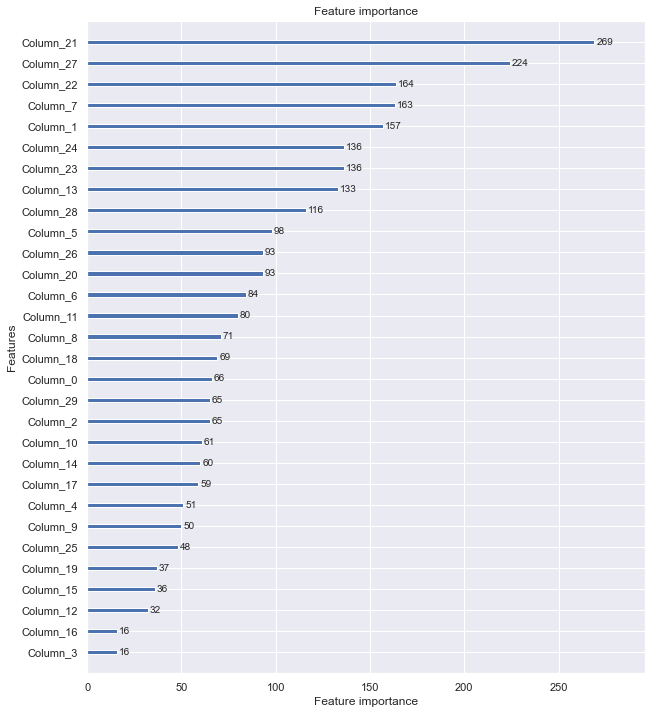

In [76]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)

### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [77]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

# confusion matrix, accuracy, precision, recall을 한꺼번에 계산하는 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall), '\n')

In [78]:
# 로지스틱 회귀(분류 모델) 모델 정의
lr_clf = LogisticRegression()
lr_clf

LogisticRegression()

In [79]:
# 학습
lr_clf.fit(X_train , y_train)

# 예측
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[33  5]
 [ 1 75]]
정확도: 0.9474, 정밀도: 0.9375, 재현율: 0.9868 



In [81]:
pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [80]:
# 테스트 데이터(타이타닉)의 분류 결정 예측 확률을 반환해준다.
pred_proba = lr_clf.predict_proba(X_test)

pred_proba.shape
pred_proba[:10]  # [Negatve(0)가 될 확률, Positive(1)가 될 확률]

array([[9.99999775e-01, 2.25304053e-07],
       [1.00000000e+00, 1.39033228e-10],
       [9.99999986e-01, 1.36842578e-08],
       [9.99999968e-01, 3.20689320e-08],
       [1.00000000e+00, 1.14419213e-10],
       [1.41504693e-01, 8.58495307e-01],
       [2.95125010e-01, 7.04874990e-01],
       [2.58035832e-02, 9.74196417e-01],
       [1.03446456e-03, 9.98965535e-01],
       [1.26550641e-02, 9.87344936e-01]])

In [82]:
# 예측 결과값은 1차원 이므로 2차원으로 reshape 한 후에 예측 확률과 concatenate 함
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1, 1)],axis=1)

# 두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
pred_proba_result[:10]

array([[9.99999775e-01, 2.25304053e-07, 0.00000000e+00],
       [1.00000000e+00, 1.39033228e-10, 0.00000000e+00],
       [9.99999986e-01, 1.36842578e-08, 0.00000000e+00],
       [9.99999968e-01, 3.20689320e-08, 0.00000000e+00],
       [1.00000000e+00, 1.14419213e-10, 0.00000000e+00],
       [1.41504693e-01, 8.58495307e-01, 1.00000000e+00],
       [2.95125010e-01, 7.04874990e-01, 1.00000000e+00],
       [2.58035832e-02, 9.74196417e-01, 1.00000000e+00],
       [1.03446456e-03, 9.98965535e-01, 1.00000000e+00],
       [1.26550641e-02, 9.87344936e-01, 1.00000000e+00]])

In [85]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

print(len(pred_proba_class1))
pred_proba_class1[:20]

114


array([2.25304053e-07, 1.39033228e-10, 1.36842578e-08, 3.20689320e-08,
       1.14419213e-10, 8.58495307e-01, 7.04874990e-01, 9.74196417e-01,
       9.98965535e-01, 9.87344936e-01, 9.99129749e-01, 8.23889382e-01,
       9.34991605e-01, 9.87852456e-01, 9.99876464e-01, 9.96735111e-01,
       8.79379780e-02, 1.02158569e-01, 9.94745886e-01, 4.33851977e-09])

In [86]:
# fpr, tps, thresholds
fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

print('분류 임곗값 Shape :', thresholds.shape, '\n')

분류 임곗값 Shape : (12,) 



In [87]:
# 반환된 임곗값 배열 로우가 55건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10]
샘플용 10개의 임곗값:  [2.  0.7 0.1]


In [88]:
# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 임곗값별 FPR:  [0.    0.105 0.184]
샘플 임곗값별 TPR:  [0.    0.947 1.   ]


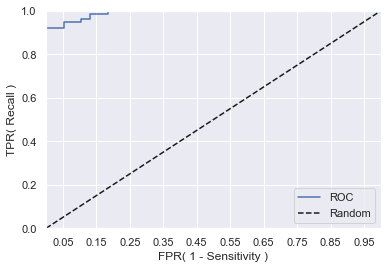

In [89]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    
    # 가운데 대각선 직선(random 값일 때)을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [90]:
from sklearn.metrics import roc_auc_score

### 아래는 roc_auc_score()의 인자를 잘못 입력한 것으로, 책에서 수정이 필요한 부분입니다. 
### 책에서는 roc_auc_score(y_test, pred)로 예측 타겟값을 입력하였으나 
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당하는 ndarray입니다. 

# pred = lr_clf.predict(X_test)
# roc_score = roc_auc_score(y_test, pred)

# 수정된 내용
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9913


In [91]:
# ROC-AUC가 추가된 get_clf_eval 함수 
# : 모델의 평가지표들(오차 행렬, 정확도, 정밀도, 재현율, f1 score, ROC AUC)을 보여준다.
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc), '\n')
